In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

df = pd.read_csv('trans.csv')
clean_text_df = pd.read_csv('clean.csv')
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

#df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
#df['punct%'] = df['text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
clean_text_df.head()

,title,text,value
0,"['georgia', 'republican', 'file', 'sweeping', ...","['bill', 'aim', 'restrict', 'location', 'secur...",T
1,"['here', 'whats', 'house', 'democrat', '19', '...","['expanded', 'extended', 'federal', 'unemploym...",T
2,"['native', 'american', 'finally', 'cabinet', '...","['senator', 'gop', 'thinking', 'twice', 'risk'...",T
3,"['without', 'trump', 'republican', 'likely', '...","['trump', 'rise', 'bornagain', 'conservative',...",T
4,"['cruz', 'say', 'wife', '', 'pissed', '', 'lea...","['', 'tell', 'pissed', 'rest', 'fine', '', 'cr...",T


In [3]:
df['value'] = df['value'].map(
                   {'T':True ,'F':False})
df.head()

,links,text,value,body punct%,title punct%,punct%,try,count_punct,count_ws,try2,body_len,twitter
0,This Congress is the most diverse ever. But Hi...,"Policy staff of color, Brenson argues, would h...",True,-700.0,-200.0,-700.0,-700.0,1.241366,1.878922,0.856754,3.004922,0
1,Native Americans Finally Have a Cabinet Nomine...,"With all that in mind, the Tlingit and Indigen...",True,-800.0,-200.0,-800.0,-800.0,1.259921,2.075782,0.869229,3.346955,0
2,Merrick Garland Heads For Confirmation Hearing...,"""American Hustle, about the Abscam case; Argo,...",True,-1300.0,-100.0,-1300.0,-1300.0,1.329755,1.925728,0.911661,3.024295,0
3,This Congress is the most diverse ever. But Hi...,Even though the 117th Congress is historically...,True,-800.0,-200.0,-800.0,-800.0,1.259921,1.967454,0.868642,3.129135,0
4,Democrats question TV carriers' decisions to h...,“Free speech scholars argue that for a democra...,True,-400.0,-500.0,-400.0,-400.0,1.166529,1.931971,0.810323,3.040848,0


In [4]:
X_test = df[['text', 'body_len', 'punct%']]
y_test = df['value']

In [5]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df[['text', 'body_len', 'punct%']], df['value'], test_size=.99)

In [6]:
df.columns

Index(['links', 'text', 'value', 'body punct%', 'title punct%', 'punct%',
       'try', 'count_punct', 'count_ws', 'try2', 'body_len', 'twitter'],
      dtype='object')

In [7]:
import pickle

Pkl_Filename = "Test_Model.pkl" 
Pkl = "Test_Fit.pkl"
Pkl_Filename1 = "Vect.pkl"
Pkl_Filename2 = "Tfdiftr.pkl"
Pkl_Filename3 = "Tfdtest.pkl"
Pkl_Filename4 = "X_train.pkl"
Pkl_Filename5 = "x_test.pkl"
Pkl_Filename6 = "train.pkl"


with open(Pkl, 'rb') as file:  
    tfidf_fit = pickle.load(file)
#with open(Pkl_Filename1, 'rb') as file:  
 #   tfidf_vect = pickle.load(file)
with open(Pkl_Filename2, 'rb') as file:  
    tfidf_tr = pickle.load(file)
#with open(Pkl_Filename3, 'rb') as file:  
#    tdif_test = pickle.load(file)
with open(Pkl_Filename4, 'rb') as file:  
    X_train_v = pickle.load(file)
with open(Pkl_Filename5, 'rb') as file:  
    X_train = pickle.load(file)
#print(Test_Model)
print(tfidf_fit)

CountVectorizer(max_df=0.4, min_df=0.01)


In [8]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_fit

tfidf_train = tfidf_tr
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = X_train_v
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)


X_test_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192
0,3.004922,-700.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.346955,-800.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.024295,-1300.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.129135,-800.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.040848,-400.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:

feature_names = X_test_vect.columns
f_names = []
for i in range(len(feature_names)):
    f_names.append(str(feature_names[i]))
print(f_names)
xn = df.columns.astype(str)
print(xn)

['body_len', 'punct%', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '1

In [11]:
sorted = X_test_vect

In [12]:
with open(Pkl_Filename, 'rb') as file:  
    Test_Model = pickle.load(file)

In [13]:
#From https://mljar.com/blog/feature-importance-in-random-forest/
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [14]:
rf = Test_Model
#RandomForestRegressor(n_estimators=100)
#rf.fit(X_train, y_train)

In [15]:
rf.feature_importances_

array([1.52688307e-02, 1.35633552e-02, 3.05372941e-04, ...,
       1.86415057e-04, 1.50789076e-04, 5.51274246e-05])

<BarContainer object of 3195 artists>

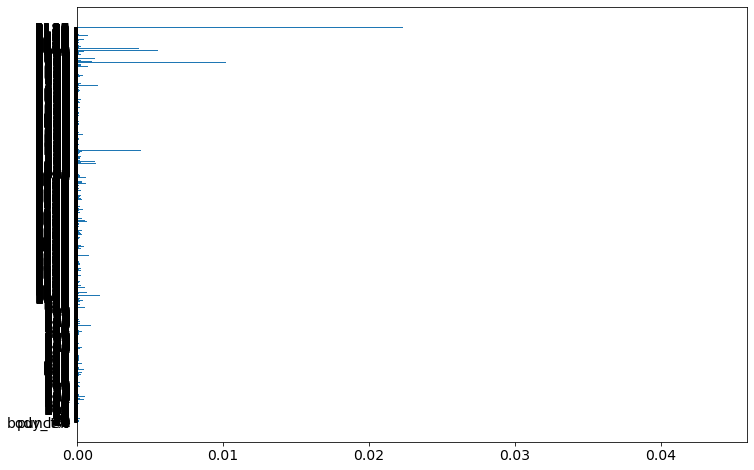

In [16]:
plt.barh(f_names, rf.feature_importances_)

In [17]:
top_idx = sorted_idx[:30]
top_idx


NameError: name 'sorted_idx' is not defined

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(f_names, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
f_names

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time
start = time.time()
rf_model = Test_Model
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = Test_Model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))
y_pred = rf_model.predict(X_test_vect)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)


In [ ]:
with open('gb_model.pkl', 'rb') as file:  
    GB_Model = pickle.load(file)
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time() 
gb_model = GB_Model
end = time.time() 
fit_time = (end - start)

start = time.time() 
y_pred = gb_model.predict(X_test_vect) 
end = time.time() 
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=False, average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)